In [ ]:
import pandas as pd
import chardet
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

1.1 Загрузка данных

In [ ]:
filepath = '/content/drive/MyDrive/Профессионалитет/Тренировки 2025/Отборочный этап 2025/Dataset_с_параметрами_пропускной_способности_станций.csv'
with open(filepath, 'rb') as f:
    result = chardet.detect(f.read())

encoding = result["encoding"]
encoding

'windows-1251'

In [ ]:
# пассажирские потоки
df_volumes = pd.read_csv('/content/drive/MyDrive/Профессионалитет/Тренировки 2025/Отборочный этап 2025/Dataset_с_данными_о_пассажирских_потоках_за_выделенный_период_по.csv',encoding=encoding,sep=';')
df_stations = pd.read_csv('/content/drive/MyDrive/Профессионалитет/Тренировки 2025/Отборочный этап 2025/Dataset_с_параметрами_пропускной_способности_станций.csv',encoding='Windows-1251',sep=';')

In [ ]:
df_volumes.head(10)

,date,hour,line,station,num_val
0,2023-01-01,0,АРБАТСК-ПОКРОВСК,Арбатская АПЛ,373
1,2023-01-01,0,АРБАТСК-ПОКРОВСК,Бауманская,157
2,2023-01-01,0,АРБАТСК-ПОКРОВСК,Волоколамская,12
3,2023-01-01,0,АРБАТСК-ПОКРОВСК,Волоколамская,41
4,2023-01-01,0,АРБАТСК-ПОКРОВСК,Измайловская,34
5,2023-01-01,0,АРБАТСК-ПОКРОВСК,Измайловская,25
6,2023-01-01,0,АРБАТСК-ПОКРОВСК,Киевская АПЛ,186
7,2023-01-01,0,АРБАТСК-ПОКРОВСК,Крылатское,31
8,2023-01-01,0,АРБАТСК-ПОКРОВСК,Крылатское,58
9,2023-01-01,0,АРБАТСК-ПОКРОВСК,Кунцевская АПЛ,20


In [ ]:
df_stations.head(10)

,line_id,line_name,station_id,station_name,entry_id,entry_name,input_doors_count,input_doors_bandwidth,input_doors_total_bandwidth,input_doors_note,...,output_turnstile_note,output_stairs_width,output_stairs_bandwidth,output_stairs_total_bandwidth,output_stairs_note,output_escalator_count,output_escalator_bandwidth,output_escalator_total_bandwidth,note,stop_id
0,12,АРБАТСК-ПОКРОВСК,126,Киевская АПЛ,6,Город,4,3.2,12.8,NaN,...,NaN,0.0,0.0,0.0,NaN,0,0.0,0.0,NaN,9000055
1,12,АРБАТСК-ПОКРОВСК,126,Киевская АПЛ,7,Пригород,7,3.2,22.4,NaN,...,NaN,0.0,0.0,0.0,NaN,0,0.0,0.0,NaN,9000055
2,12,АРБАТСК-ПОКРОВСК,129,Смоленская АПЛ,5,Центр,3,3.2,9.6,NaN,...,NaN,0.0,0.0,0.0,NaN,0,0.0,0.0,NaN,9000056
3,12,АРБАТСК-ПОКРОВСК,131,Арбатская АПЛ,5,Центр,4,3.2,12.8,NaN,...,реверс,0.0,0.0,0.0,NaN,0,0.0,0.0,NaN,9000057
4,12,АРБАТСК-ПОКРОВСК,133,Пл. Революции,3,Запад,4,3.2,12.8,NaN,...,NaN,0.0,0.0,0.0,NaN,0,0.0,0.0,NaN,9000058
5,12,АРБАТСК-ПОКРОВСК,133,Пл. Революции,4,Восток,4,3.2,12.8,NaN,...,NaN,0.0,0.0,0.0,NaN,0,0.0,0.0,NaN,9000058
6,12,АРБАТСК-ПОКРОВСК,136,Курская АПЛ,5,Центр,4,3.2,12.8,NaN,...,3 ПКА 1-реверс,0.0,0.0,0.0,NaN,0,0.0,0.0,NaN,9000059
7,12,АРБАТСК-ПОКРОВСК,138,Бауманская,5,Центр,6,3.2,19.2,NaN,...,NaN,0.0,0.0,0.0,NaN,0,0.0,0.0,NaN,9000060
8,12,АРБАТСК-ПОКРОВСК,140,Электрозав-я АПЛ,5,Центр,4,3.2,12.8,NaN,...,NaN,0.0,0.0,0.0,NaN,0,0.0,0.0,NaN,9000061
9,12,АРБАТСК-ПОКРОВСК,142,Семёновская,5,Центр,4,3.2,12.8,NaN,...,6 реверс,3.0,3.0,9.0,NaN,0,0.0,0.0,NaN,9000062


In [ ]:
df_volumes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2162002 entries, 0 to 2162001
Data columns (total 5 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   date     object
 1   hour     int64 
 2   line     object
 3   station  object
 4   num_val  int64 
dtypes: int64(2), object(3)
memory usage: 82.5+ MB


In [ ]:
df_stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 39 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   line_id                           293 non-null    int64  
 1   line_name                         293 non-null    object 
 2   station_id                        293 non-null    int64  
 3   station_name                      293 non-null    object 
 4   entry_id                          293 non-null    int64  
 5   entry_name                        293 non-null    object 
 6   input_doors_count                 293 non-null    int64  
 7   input_doors_bandwidth             293 non-null    float64
 8   input_doors_total_bandwidth       293 non-null    float64
 9   input_doors_note                  0 non-null      float64
 10  input_turnstile_count             293 non-null    int64  
 11  input_turnstile_bandwidth         293 non-null    float64
 12  input_tu

In [ ]:
#создание базы
conn = sqlite3.connect('my_database.db')

In [ ]:
#добавляем таблички

df_volumes.to_sql('passenger_flow',conn,if_exists='append', index=False)
df_stations.to_sql('stations_features',conn,if_exists='append', index=False)

293

1.3 Проверка на нормальное распределение

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 2162002.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk Test: Statistic=0.6878967475364546, p-value=3.9907909891624666e-202
Признак не имеет нормального распределения


Text(0, 0.5, 'Плотность')

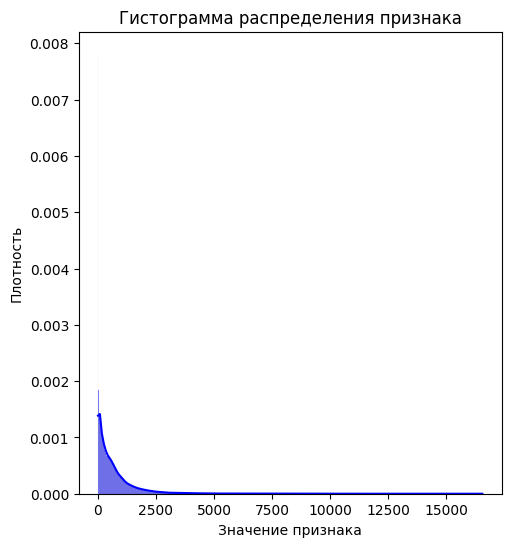

In [ ]:
# проверка одного отдельного признака - количества пассажиров на станции в момент времени
df_num_val = pd.read_sql('select * from passenger_flow pf',conn)

# Количественные тест
shapiro_test = shapiro(df_num_val['num_val'])

print(f"Shapiro-Wilk Test: Statistic={shapiro_test.statistic}, p-value={shapiro_test.pvalue}")

if shapiro_test.pvalue>0.05:
  print('Признак распределен нормально')
else:
  print('Признак не имеет нормального распределения')

plt.figure(figsize=(12, 6))

#Гистограмма
plt.subplot(1, 2, 1)
sns.histplot(df_num_val['num_val'], kde=True, color='blue', stat='density')
plt.title('Гистограмма распределения признака')
plt.xlabel('Значение признака')
plt.ylabel('Плотность')

Тест Шапиро-Уилка для 'input_doors_count': Statistic=0.6389, p-value=0.0000
Распределение 'input_doors_count' отличается от нормального.
Тест Шапиро-Уилка для 'input_doors_bandwidth': Statistic=0.0741, p-value=0.0000
Распределение 'input_doors_bandwidth' отличается от нормального.
Тест Шапиро-Уилка для 'input_doors_total_bandwidth': Statistic=0.6252, p-value=0.0000
Распределение 'input_doors_total_bandwidth' отличается от нормального.
Тест Шапиро-Уилка для 'input_turnstile_count': Statistic=0.7834, p-value=0.0000
Распределение 'input_turnstile_count' отличается от нормального.
Тест Шапиро-Уилка для 'input_turnstile_bandwidth': Statistic=0.0741, p-value=0.0000
Распределение 'input_turnstile_bandwidth' отличается от нормального.


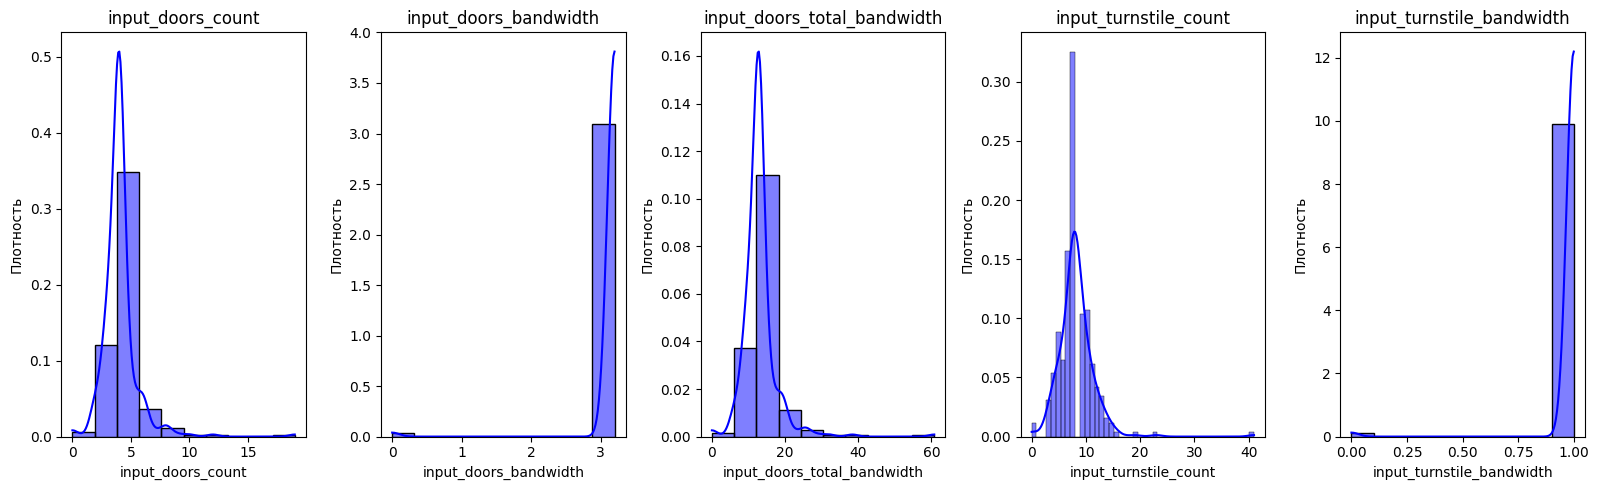

In [ ]:
# анализ нескольких столбцов
df_stations = pd.read_sql('select * from stations_features',conn)

df_stations_features = df_stations[df_stations.columns[6:]]

df_stations_features = df_stations_features.select_dtypes(exclude=['object'])


for column in df_stations_features.columns[:5]:
    stat, p_value = shapiro(df_stations_features[column])
    print(f"Тест Шапиро-Уилка для '{column}': Statistic={stat:.4f}, p-value={p_value:.4f}")
    if p_value > 0.05:
        print(f"Распределение '{column}' близко к нормальному.")
    else:
        print(f"Распределение '{column}' отличается от нормального.")

# Визуализация гистограмм на одном графике
plt.figure(figsize=(80, 5))
for i, column in enumerate(df_stations_features.columns[:5], 1):
    plt.subplot(1, len(df_stations_features.columns), i)
    sns.histplot(df_stations_features[column], kde=True, color='blue', stat='density')
    plt.title(f'{column}')
    plt.xlabel(column)
    plt.ylabel('Плотность')


plt.tight_layout()
plt.show()

In [ ]:
#оценка меры скошенности
skewness = df_stations_features.skew()

# Выводим результат
print("Мера скошенности для каждого столбца:")
print(skewness)

Мера скошенности для каждого столбца:
input_doors_count                    3.956553
input_doors_bandwidth               -9.780353
input_doors_total_bandwidth          4.137446
input_turnstile_count                3.396326
input_turnstile_bandwidth           -9.780353
input_turnstile_total_bandwidth      3.407794
input_stairs_width                   0.238064
input_stairs_bandwidth              -0.414447
input_stairs_total_bandwidth         0.233652
input_escalator_count                0.489211
input_escalator_bandwidth            0.244277
input_escalator_total_bandwidth      0.455605
output_doors_count                   0.573121
output_doors_bandwidth              -4.448287
output_doors_total_bandwidth         0.573121
output_turnstile_count               0.637473
output_turnstile_bandwidth          -0.783216
output_turnstile_total_bandwidth     0.684143
output_stairs_width                  4.044109
output_stairs_bandwidth              4.464345
output_stairs_total_bandwidth        3.962

2.2 Разработка функционала аналитической системы

Необходимо вычислить такие характеристики, как загруженность станции в процентах относительно максимальной загруженности в заданный интервал времени, реальную пропускную способность станции в заданный интервал времени, топ самых загруженных станций, среднее количество пассажиров на станциях в течение заданного интервала времени, количество станций без инфраструктуры для маломобильных граждан.